<a href="https://colab.research.google.com/github/mir-sam-ali/CS5223-Deep-Learning-Project/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Project

## Data Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

In [ ]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

mnist_dataset_train  = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
mnist_dataset_test = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



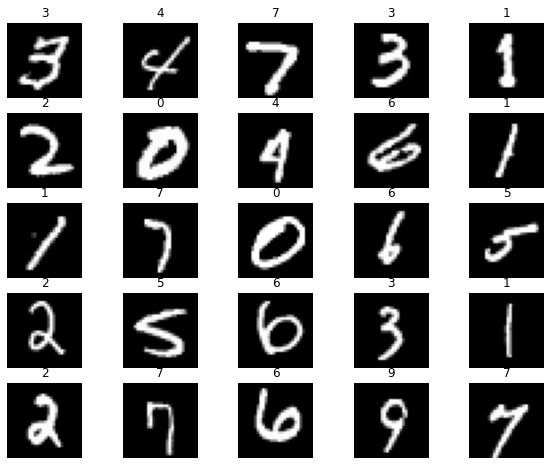

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_dataset_train), size=(1,)).item()
    img, label = mnist_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
mnist_dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
# custom tranformer for rotation

class Rotate(object):
    def __init__(self, angle):
        self.angle = angle

    def __call__(self, img):
        return transforms.functional.rotate(img, self.angle)

In [ ]:
mnist_90_dataset_train = None 
mnist_90_dataset_test = None

# Rotate the MNIST images by 90 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(270),
  ToTensor()
])
mnist_90_dataset_train  = datasets.MNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_90_dataset_test   = datasets.MNIST(root='data', train=False, transform=transformOpt, download=True)

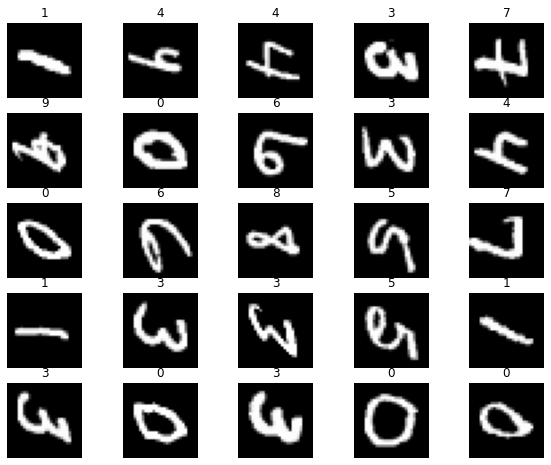

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_90_dataset_train), size=(1,)).item()
    img, label = mnist_90_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

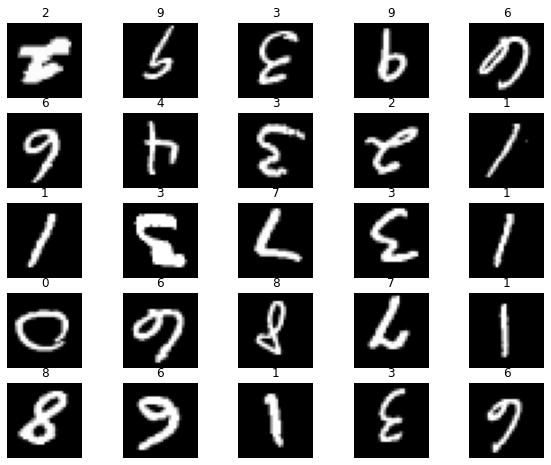

In [ ]:


mnist_180_dataset_train = None 
mnist_180_dataset_test = None 

# Rotate the MNIST images by 180 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(180),
  ToTensor()
])
mnist_180_dataset_train  = datasets.MNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_180_dataset_test   = datasets.MNIST(root='data', train=False, transform=transformOpt, download=True)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_180_dataset_train), size=(1,)).item()
    img, label = mnist_180_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

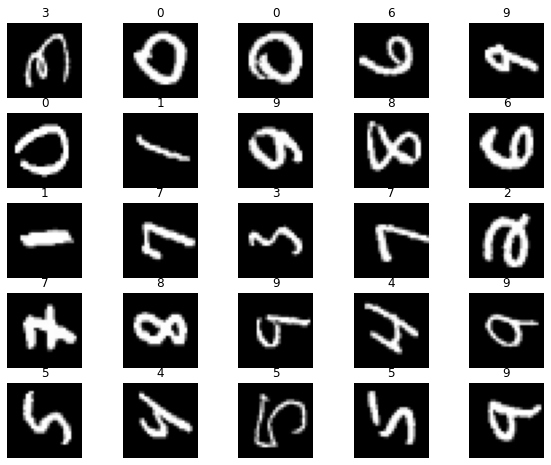

In [ ]:
mnist_270_dataset_train = None 
mnist_270_dataset_test = None

# Rotate the MNIST images by 270 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(90),
  ToTensor()
])
mnist_270_dataset_train  = datasets.MNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_270_dataset_test   = datasets.MNIST(root='data', train=False, transform=transformOpt, download=True)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_270_dataset_train), size=(1,)).item()
    img, label = mnist_270_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## MNIST Basic Classification and Testing (Model Building and Testing)

### Model Building

In [ ]:
from torch.utils.data import DataLoader
import torch.nn as nn 
from torch import optim

In [ ]:
loaders = {
    'train' : DataLoader(mnist_dataset_train, batch_size = 100, shuffle= True, num_workers=1),
    'test'  : DataLoader(mnist_dataset_test, batch_size = 100, shuffle= True, num_workers=1)
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f0839bc0450>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f0839b33210>}

In [ ]:
# Creating the CNN class for basic classification

class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1,16,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )

        self.out = nn.Linear(32*7*7,10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)
        output = self.out(x)

        return output, x

In [ ]:
cnn_mnist = CNN_MNIST()
print(cnn_mnist)

CNN_MNIST(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(cnn_mnist.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [ ]:
# Training

from torch.autograd import Variable

num_epochs = 10

def train(num_epochs, cnn, loaders):
    cnn.train()

    total_steps = len(loaders['train'])

    for epoch in range(num_epochs):
        for i,(images, labels) in enumerate(loaders['train']):
            batch_x = Variable(images)
            batch_y = Variable(labels)

            output = cnn(batch_x)[0]
            loss = loss_func(output, batch_y)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            if (i+1)%100 == 0:
                print('Epoch [{}/{}], Step[{},{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_steps, loss.item() ))

train(num_epochs, cnn_mnist, loaders)

Epoch [1/10], Step[100,600], Loss: 0.2167
Epoch [1/10], Step[200,600], Loss: 0.0213
Epoch [1/10], Step[300,600], Loss: 0.0945
Epoch [1/10], Step[400,600], Loss: 0.1865
Epoch [1/10], Step[500,600], Loss: 0.0623
Epoch [1/10], Step[600,600], Loss: 0.0164
Epoch [2/10], Step[100,600], Loss: 0.0458
Epoch [2/10], Step[200,600], Loss: 0.2215
Epoch [2/10], Step[300,600], Loss: 0.0316
Epoch [2/10], Step[400,600], Loss: 0.0300
Epoch [2/10], Step[500,600], Loss: 0.0469
Epoch [2/10], Step[600,600], Loss: 0.0957
Epoch [3/10], Step[100,600], Loss: 0.0896
Epoch [3/10], Step[200,600], Loss: 0.0837
Epoch [3/10], Step[300,600], Loss: 0.0392
Epoch [3/10], Step[400,600], Loss: 0.0056
Epoch [3/10], Step[500,600], Loss: 0.0091
Epoch [3/10], Step[600,600], Loss: 0.0192
Epoch [4/10], Step[100,600], Loss: 0.0692
Epoch [4/10], Step[200,600], Loss: 0.0432
Epoch [4/10], Step[300,600], Loss: 0.1739
Epoch [4/10], Step[400,600], Loss: 0.0059
Epoch [4/10], Step[500,600], Loss: 0.0151
Epoch [4/10], Step[600,600], Loss:

In [ ]:
# tarining accuracy
def training_accuracy(test_data):
    cnn_mnist.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output, last_layer = cnn_mnist(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print('Training Accuracy of the model on the 10000 test images: %.2f' % accuracy)

training_accuracy(loaders['train'])

Training Accuracy of the model on the 10000 test images: 0.99


In [ ]:
# Print model's state_dict
model = cnn_mnist

print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
   print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.0.weight 	 torch.Size([16, 1, 5, 5])
conv1.0.bias 	 torch.Size([16])
conv2.0.weight 	 torch.Size([32, 16, 5, 5])
conv2.0.bias 	 torch.Size([32])
out.weight 	 torch.Size([10, 1568])
out.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {0: {'step': 6000, 'exp_avg': tensor([[[[ 1.2208e-04,  1.4220e-05,  7.7958e-06,  1.0120e-05,  3.1130e-05],
          [ 7.8467e-05,  4.8750e-06,  1.4585e-07,  3.0755e-08, -6.8034e-07],
          [ 1.6198e-03,  1.6152e-04, -2.5303e-04, -7.6671e-05,  1.8478e-04],
          [ 1.0267e-03,  1.3290e-03,  1.6590e-04,  5.1914e-05,  5.4331e-04],
          [ 1.5313e-05,  6.6014e-04,  5.5313e-04, -2.9574e-05, -3.5445e-05]]],


        [[[-1.4721e-04, -1.1981e-03, -2.1663e-03, -2.1757e-03, -2.5018e-03],
          [-1.0857e-03, -1.8837e-03, -5.3290e-03, -4.4372e-03, -3.1112e-03],
          [-2.7229e-03, -3.9992e-03, -5.9697e-03, -3.8940e-03, -1.2707e-03],
          [-2.9765e-03, -1.9711e-03, -1.4405e-03,  1.7572e-04, -1.9381e-03],
      

In [ ]:
# save trained model

torch.save(cnn_mnist.state_dict(), "./CNN_MNIST.model")

In [ ]:
# load trained model and test

cnn_mnist = CNN_MNIST()
cnn_mnist.load_state_dict(torch.load("./CNN_MNIST.model"))

def test(test_data):
    cnn_mnist.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output, last_layer = cnn_mnist(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test(loaders['test'])

Test Accuracy of the model on the 10000 test images: 0.97


In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:10].numpy()
test_output, last_layer = cnn_mnist(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [4 8 6 1 2 4 1 9 1 7]
Actual number: [4 8 6 1 7 4 1 9 1 7]


### MNIST Classification on 90* Rotated Images (Testing)

In [ ]:
test(DataLoader(mnist_90_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.14


### MNIST Classification on 180* Rotated Images (Testing)

In [ ]:
test(DataLoader(mnist_180_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.38


### MNIST Classification on 270* Rotated Images (Testing)

In [ ]:
test(DataLoader(mnist_270_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.11


## Rotation Angle Classification Model

### Change Labels

In [ ]:
dataset_0_train = [(img, 0) for img, _ in mnist_dataset_train]
dataset_0_test = [(img, 0) for img, _ in mnist_dataset_test]

dataset_0 = dataset_0_train + dataset_0_test
print(len(dataset_0))

70000


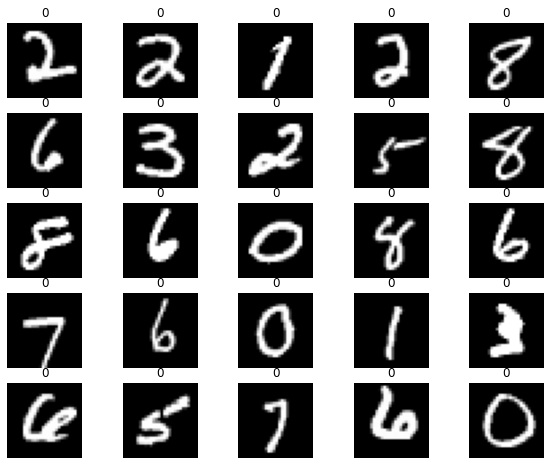

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_0), size=(1,)).item()
    img, label = dataset_0[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
dataset_90_train = [(img, 1) for img, _ in mnist_90_dataset_train]
dataset_90_test = [(img, 1) for img, _ in mnist_90_dataset_test]

dataset_90 = dataset_90_train + dataset_90_test
print(len(dataset_90))

70000


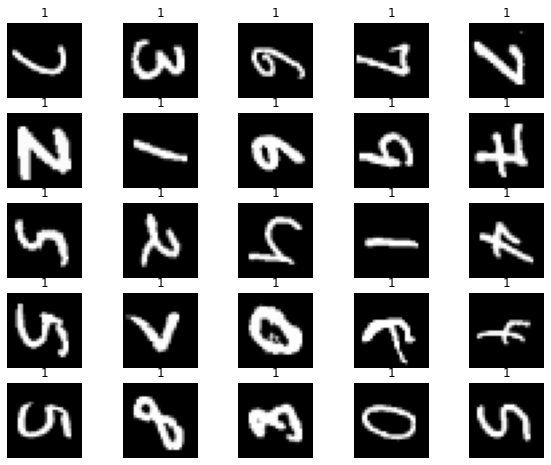

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_90), size=(1,)).item()
    img, label = dataset_90[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
dataset_180_train = [(img, 2) for img, _ in mnist_180_dataset_train]
dataset_180_test = [(img, 2) for img, _ in mnist_180_dataset_test]

dataset_180 = dataset_180_train + dataset_180_test
print(len(dataset_180))

70000


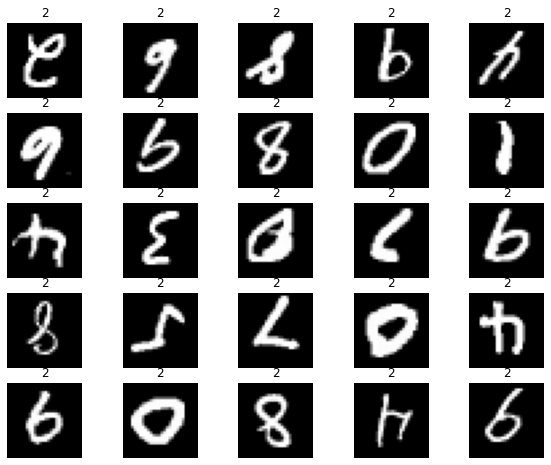

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_180), size=(1,)).item()
    img, label = dataset_180[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
dataset_270_train = [(img, 3) for img, _ in mnist_270_dataset_train]
dataset_270_test = [(img, 3) for img, _ in mnist_270_dataset_test]

dataset_270 = dataset_270_train + dataset_270_test
print(len(dataset_270))

70000


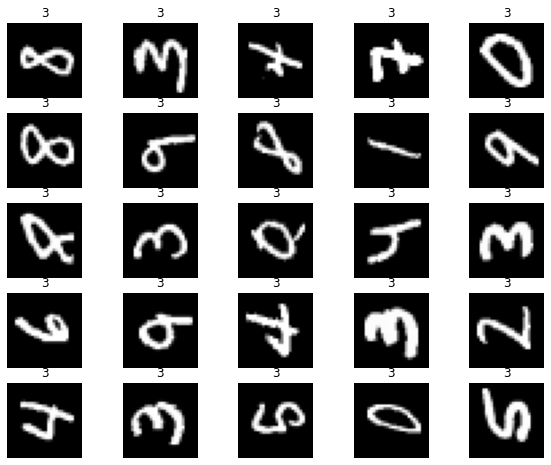

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_270), size=(1,)).item()
    img, label = dataset_270[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Merge and create datasets

In [ ]:
dataset = dataset_0 + dataset_90 + dataset_180 + dataset_270
len(dataset)

280000

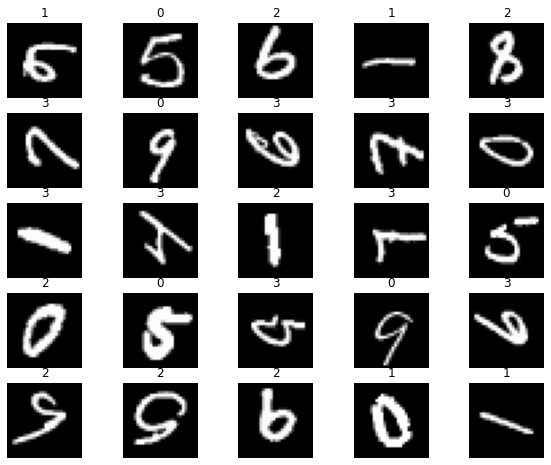

In [ ]:
random.shuffle(dataset)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
dataset_train = dataset[:200000]
dataset_test = dataset[200000:]

### Model Building

In [ ]:
loaders = {
    'train' : DataLoader(dataset_train, batch_size = 200, shuffle= True, num_workers=1),
    'test'  : DataLoader(dataset_test, batch_size = 200, shuffle= True, num_workers=1)
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f0839666090>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f0839666f10>}

In [ ]:
# Creating the CNN class for Rotating classification

class CNN_ROT(nn.Module):
    def __init__(self):
        super(CNN_ROT, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1,16,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )

        self.out = nn.Linear(32*7*7, 4)

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)
        output = self.out(x)

        return output, x

In [ ]:
cnn_rotation = CNN_ROT()
print(cnn_rotation)

CNN_ROT(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=4, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(cnn_rotation.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [ ]:
# Training

from torch.autograd import Variable

num_epochs = 10

loss_vs_epoch = []

def train(num_epochs, cnn, loaders):
    cnn.train()

    total_steps = len(loaders['train'])

    for epoch in range(num_epochs):
        temp_loss = 0
        for i, (images, labels) in enumerate(loaders['train']):
            batch_x = Variable(images)
            batch_y = Variable(labels)

            output = cnn(batch_x)[0]
            loss = loss_func(output, batch_y)
            temp_loss += loss

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            if (i+1)%100 == 0:
                print('Epoch [{}/{}], Step[{},{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_steps, loss.item() ))

        loss_vs_epoch.append(temp_loss/1000)

train(num_epochs, cnn_rotation, loaders)

Epoch [1/10], Step[100,1000], Loss: 0.0463
Epoch [1/10], Step[200,1000], Loss: 0.0153
Epoch [1/10], Step[300,1000], Loss: 0.0136
Epoch [1/10], Step[400,1000], Loss: 0.0202
Epoch [1/10], Step[500,1000], Loss: 0.0363
Epoch [1/10], Step[600,1000], Loss: 0.0845
Epoch [1/10], Step[700,1000], Loss: 0.0164
Epoch [1/10], Step[800,1000], Loss: 0.0055
Epoch [1/10], Step[900,1000], Loss: 0.0535
Epoch [1/10], Step[1000,1000], Loss: 0.0139
Epoch [2/10], Step[100,1000], Loss: 0.0403
Epoch [2/10], Step[200,1000], Loss: 0.0441
Epoch [2/10], Step[300,1000], Loss: 0.0410
Epoch [2/10], Step[400,1000], Loss: 0.0414
Epoch [2/10], Step[500,1000], Loss: 0.0665
Epoch [2/10], Step[600,1000], Loss: 0.0158
Epoch [2/10], Step[700,1000], Loss: 0.0100
Epoch [2/10], Step[800,1000], Loss: 0.0877
Epoch [2/10], Step[900,1000], Loss: 0.0618
Epoch [2/10], Step[1000,1000], Loss: 0.0652
Epoch [3/10], Step[100,1000], Loss: 0.0221
Epoch [3/10], Step[200,1000], Loss: 0.0176
Epoch [3/10], Step[300,1000], Loss: 0.0085
Epoch [3/

In [ ]:
# tarining accuracy
def training_accuracy(test_data):
    cnn_rotation.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output, last_layer = cnn_rotation(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print('Training Accuracy of the model on the 10000 test images: %.2f' % accuracy)

training_accuracy(loaders['train'])

Training Accuracy of the model on the 10000 test images: 0.99


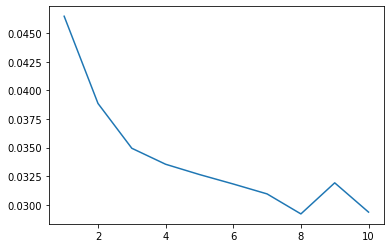

In [ ]:
x = np.array([i for i in range(1, num_epochs+1)])
y = loss_vs_epoch

plt.plot(x, y)

In [ ]:
# Print model's state_dict
model = cnn_rotation

print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
   print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.0.weight 	 torch.Size([16, 1, 5, 5])
conv1.0.bias 	 torch.Size([16])
conv2.0.weight 	 torch.Size([32, 16, 5, 5])
conv2.0.bias 	 torch.Size([32])
out.weight 	 torch.Size([4, 1568])
out.bias 	 torch.Size([4])
Optimizer's state_dict:
state 	 {0: {'step': 11000, 'exp_avg': tensor([[[[-1.1086e-03, -1.8110e-03, -1.8475e-03, -1.9099e-03, -7.9993e-04],
          [ 2.8006e-03, -2.0778e-05, -3.6948e-06,  2.5495e-05,  1.0622e-03],
          [ 2.5324e-03, -5.5641e-05,  6.9579e-05,  4.5215e-05, -5.7767e-03],
          [ 6.4158e-04,  4.8811e-06,  2.5049e-05, -1.0242e-05, -1.0890e-02],
          [ 5.7650e-04, -3.9100e-04, -1.2581e-03, -1.2876e-04, -1.3781e-02]]],


        [[[ 5.9119e-05,  2.0742e-05,  4.7477e-06, -5.6524e-05, -1.3966e-05],
          [ 4.3131e-05,  1.8091e-06, -9.7476e-10, -5.6526e-05, -1.3964e-05],
          [ 3.1661e-06,  5.6052e-45, -1.1095e-06, -5.4089e-05, -4.4346e-06],
          [-1.5662e-05,  5.1510e-07, -1.5908e-05, -2.7465e-05,  1.5918e-05],
       

In [ ]:
# save trained model

torch.save(cnn_rotation.state_dict(), "./CNN_ROT.model")

In [ ]:
# load trained model and test

cnn_rotation = CNN_ROT()
cnn_rotation.load_state_dict(torch.load("./CNN_ROT.model"))

def test(test_data):
    cnn_rotation.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output, last_layer = cnn_rotation(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print(f'Test Accuracy of the model on the {len(test_data)*200} test images: %.2f' % accuracy)

test(loaders['test'])

Test Accuracy of the model on the 80000 test images: 0.98


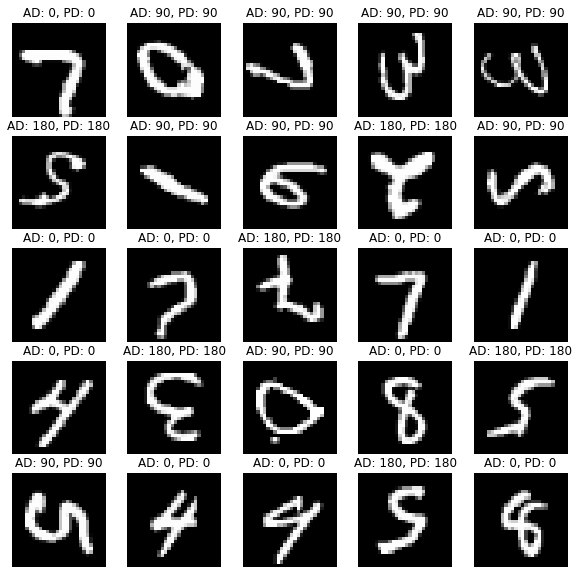

In [ ]:
# map class labels to rotation degree
class2deg = {
    0: 0,
    1: 90,
    2: 180,
    3: 270
}

sample = next(iter(loaders['test']))
imgs, lbls = sample
imgs = imgs[:25]
lbls = lbls[:25].numpy()
test_output, last_layer = cnn_rotation(imgs)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()

figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    img = imgs[i-1]
    label = lbls[i-1]
    pred = pred_y[i-1]
    figure.add_subplot(rows, cols, i)
    plt.title(f"AD: {class2deg[label]}, PD: {class2deg[pred]}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Final Model